In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

## Generate and visualize dummy dataset

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

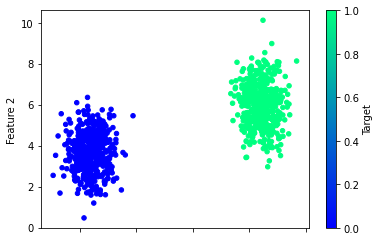

In [5]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

## Create training and test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Standardize dataset

In [7]:
X_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_scaler.fit(X_train)

# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create Keras Sequential model

In [22]:
nn_model = tf.keras.models.Sequential()

In [23]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

`Dense` class
- The **input_dim** parameter indicates how many inputs will be in the model (in this case two).
- The **units** parameter indicates how many neurons we want in the hidden layer (in this case one).
- The **activation** parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [24]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.9747
Epoch 2/200
24/24 [==============================] - 0s 1000us/step - loss: 0.4202 - accuracy: 1.0000
Epoch 3/200
24/24 [==============================] - 0s 870us/step - loss: 0.4085 - accuracy: 1.0000
Epoch 4/200
24/24 [==============================] - 0s 958us/step - loss: 0.3972 - accuracy: 1.0000
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 1.0000
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 1.0000
Epoch 7/200
24/24 [==============================] - 0s 957us/step - loss: 0.3661 - accuracy: 1.0000
Epoch 8/200
24/24 [==============================] - 0s 1000us/step - loss: 0.3566 - accuracy: 1.0000
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 1.0000
Epoch 10/200
24/24 [==============================] - 0s 913us/step - loss: 0.3387 - accuracy: 1.

<AxesSubplot:>

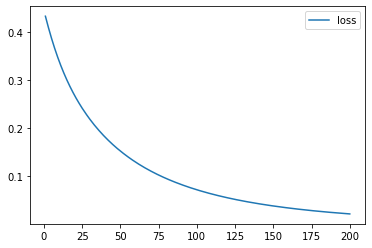

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

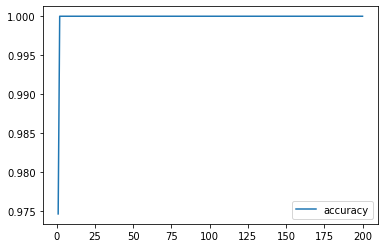

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Evaluate the model using test data

In [30]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy; {model_accuracy}")

8/8 - 0s - loss: 0.0221 - accuracy: 1.0000 - 145ms/epoch - 18ms/step
Loss: 0.022148098796606064, Accuracy; 1.0


## Prediction of new dataset

In [34]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## 19.2.4 Non-linear Numbers

### Create Non-linear data

In [35]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [41]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

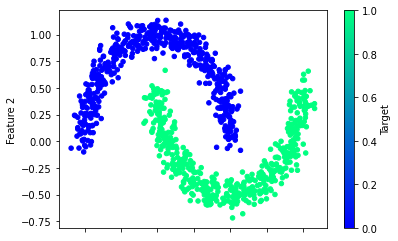

In [43]:
# Create dataframe to plot non-linear data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

### Create training and test sets

In [44]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

### Scale training data

In [45]:
# Create scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

### Train the model with the nonlinear data

In [46]:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3103 - accuracy: 0.5400
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1470 - accuracy: 0.5507
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0424 - accuracy: 0.5653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9674 - accuracy: 0.5867
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9119 - accuracy: 0.6013
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8643 - accuracy: 0.6120
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8249 - accuracy: 0.6200
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7889 - accuracy: 0.6280
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7567 - accuracy: 0.6373
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.6480
Epoch 11/

### Plot the loss and accuracy curves

<AxesSubplot:xlabel='epoch', ylabel='loss'>

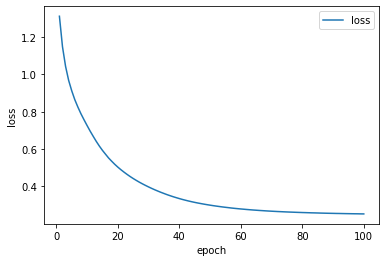

In [57]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss", xlabel='epoch', ylabel='loss')

<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

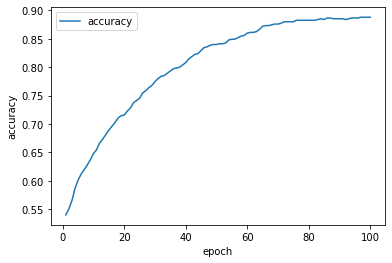

In [58]:
# plot the accuracy
history_df.plot(y="accuracy", xlabel='epoch', ylabel='accuracy')

In [61]:
history_df[80:90]

,loss,accuracy
81,0.260142,0.882667
82,0.259601,0.882667
83,0.259026,0.884000
84,0.258678,0.885333
85,0.258211,0.884000
86,0.257646,0.886667
87,0.257236,0.886667
88,0.256842,0.885333
89,0.256486,0.885333
90,0.256141,0.885333


## 19.2.5 Multiple Neuron Neural Network

In [62]:
# Generate new sequental model
new_model = tf.keras.models.Sequential()

> Add input, hidden, and output layers using the `Dense` class

In [63]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

> Compile and train the model using non-linear moon-shaped training data. Use the same training parameters, including loss metric, optimizer function, and number of epochs

In [64]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 999us/step - loss: 0.8552 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 1000us/step - loss: 0.8102 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 956us/step - loss: 0.7698 - accuracy: 0.4693
Epoch 4/100
24/24 [==============================] - 0s 1000us/step - loss: 0.7325 - accuracy: 0.4720
Epoch 5/100
24/24 [==============================] - 0s 957us/step - loss: 0.6970 - accuracy: 0.4840
Epoch 6/100
24/24 [==============================] - 0s 1000us/step - loss: 0.6637 - accuracy: 0.5187
Epoch 7/100
24/24 [==============================] - 0s 999us/step - loss: 0.6314 - accuracy: 0.5973
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7573
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7947
Epoch 10/100
24/24 [==============================] - 0s 956us/step - loss: 0.5432 - accurac

#### There are a few means of optimizing a neural network:

- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.

In [67]:
df_moons.dtypes

Feature 1    float64
Feature 2    float64
Target         int64
dtype: object

<AxesSubplot:>

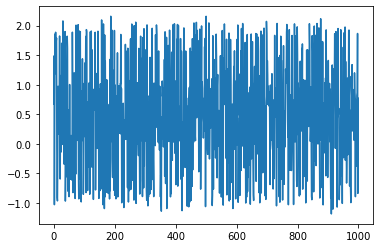

In [74]:
df_moons["Feature 1"].plot()

In [73]:
df_moons.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.00000
mean,0.497459,0.249927,0.50000
std,0.867873,0.499273,0.50025
min,-1.183650,-0.718449,0.00000
25%,-0.062536,-0.206882,0.00000
50%,0.492127,0.249358,0.50000
75%,1.065532,0.701248,1.00000
max,2.156435,1.133889,1.00000


#### Four most-used activiation functions by data complexity and use case:
1. The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
2. The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
3. The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
4. The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.